# Breast Cancer Prediction Model
Dataset: [kaggle.com](https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset)

### Deep Neural Network to predict a cancer stance: wheter it is benign (B) or malignant (M).


## Tools useed:
> * pythorch
* pandas
* matplotlib
* numpy

## Data details :

>* y. The outcomes. A factor with two levels denoting whether a mass is malignant ("M") or benign ("B").
* x. The predictors. A matrix with the mean, standard error and worst value of each of 10 nuclear measurements on the slide, for 30 total features per biopsy:
  * radius - Nucleus radius (mean of distances from center to points on perimeter).
  * texture - Nucleus texture (standard deviation of grayscale values).
  * perimeter - Nucleus perimeter.
  * area - Nucleus area.
  * smoothness - Nucleus smoothness (local variation in radius lengths).
  * compactness - Nucleus compactness (perimeter^2/area - 1).
  * concavity -  Nucleus concavity (severity of concave portions of the contour).
  * concave_pts - Number of concave portions of the nucleus contour.
  * symmetry - Nucleus symmetry.
  * fractal_dim - Nucleus fractal dimension ("coastline approximation" -1).



In [ ]:
# !pip install kaggle
# !mkdir ~/.kaggle
# !cp /content/drive/MyDrive/kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download utkarshx27/breast-cancer-wisconsin-diagnostic-dataset
# !unzip /content/breast-cancer-wisconsin-diagnostic-dataset.zip

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, TensorDataset, DataLoader
from matplotlib import pyplot as plt

# Learn data

In [ ]:
df = pd.read_csv('brca.csv', index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 1 to 569
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [ ]:
df['y'].unique()

array(['B', 'M'], dtype=object)

In [ ]:
df['y'].value_counts()

B    357
M    212
Name: y, dtype: int64

# Data transformation

In [ ]:
translate = {'B':0, 'M':1}

In [ ]:
df.y.replace(translate, inplace=True)

In [ ]:
inputs = torch.tensor(df[df.columns[:-1]].to_numpy()).to(torch.float)
targets = torch.tensor(df[df.columns[-1]].to_numpy()).to(torch.float)
inputs[:3], targets[:10]

(tensor([[1.3540e+01, 1.4360e+01, 8.7460e+01, 5.6630e+02, 9.7790e-02, 8.1290e-02,
          6.6640e-02, 4.7810e-02, 1.8850e-01, 5.7660e-02, 2.6990e-01, 7.8860e-01,
          2.0580e+00, 2.3560e+01, 8.4620e-03, 1.4600e-02, 2.3870e-02, 1.3150e-02,
          1.9800e-02, 2.3000e-03, 1.5110e+01, 1.9260e+01, 9.9700e+01, 7.1120e+02,
          1.4400e-01, 1.7730e-01, 2.3900e-01, 1.2880e-01, 2.9770e-01, 7.2590e-02],
         [1.3080e+01, 1.5710e+01, 8.5630e+01, 5.2000e+02, 1.0750e-01, 1.2700e-01,
          4.5680e-02, 3.1100e-02, 1.9670e-01, 6.8110e-02, 1.8520e-01, 7.4770e-01,
          1.3830e+00, 1.4670e+01, 4.0970e-03, 1.8980e-02, 1.6980e-02, 6.4900e-03,
          1.6780e-02, 2.4250e-03, 1.4500e+01, 2.0490e+01, 9.6090e+01, 6.3050e+02,
          1.3120e-01, 2.7760e-01, 1.8900e-01, 7.2830e-02, 3.1840e-01, 8.1830e-02],
         [9.5040e+00, 1.2440e+01, 6.0340e+01, 2.7390e+02, 1.0240e-01, 6.4920e-02,
          2.9560e-02, 2.0760e-02, 1.8150e-01, 6.9050e-02, 2.7730e-01, 9.7680e-01,
          1.90

In [ ]:
num_items = len(inputs)
num_items

569

In [ ]:
dataset = TensorDataset(inputs, targets)
dataset[-1]

(tensor([2.0600e+01, 2.9330e+01, 1.4010e+02, 1.2650e+03, 1.1780e-01, 2.7700e-01,
         3.5140e-01, 1.5200e-01, 2.3970e-01, 7.0160e-02, 7.2600e-01, 1.5950e+00,
         5.7720e+00, 8.6220e+01, 6.5220e-03, 6.1580e-02, 7.1170e-02, 1.6640e-02,
         2.3240e-02, 6.1850e-03, 2.5740e+01, 3.9420e+01, 1.8460e+02, 1.8210e+03,
         1.6500e-01, 8.6810e-01, 9.3870e-01, 2.6500e-01, 4.0870e-01, 1.2400e-01]),
 tensor(1.))

In [ ]:
train_size = int(0.8 *num_items)
val_size = int(0.1 * num_items)
test_size = num_items - train_size - val_size
train_size, val_size, test_size

(455, 56, 58)

In [ ]:
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])
train_set[0][0].dtype

torch.float32

In [ ]:
batch_size = 256

train_dl = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_set, batch_size=batch_size, num_workers=2, pin_memory=True)

# Model:

> * ### 30 nodes input layer
* ### 3 hidden layers with sizes: 256, 128, 64
* ### binary output

In [ ]:
class BreastCancerModel(nn.Module):
  def __init__(self, in_size, hidden1_size, hidden2_size, hidden3_size, out_size):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(in_size, hidden1_size),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(hidden1_size, hidden2_size),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(hidden2_size, hidden3_size),
        nn.ReLU(),
        nn.Linear(hidden3_size, out_size),
        nn.Sigmoid()
    )

  def forward(self, xb):
    xb = self.network(xb)
    return xb

  def training_step(self, batch):
    data, labels = batch
    out = self(data)
    loss = F.binary_cross_entropy(out, labels.unsqueeze(1))
    return loss

  def validation_step(self, batch):
    data, labels = batch
    out = self(data)
    loss = F.binary_cross_entropy(out, labels.unsqueeze(1))
    acc = accuracy(out, labels)

    return {'val_loss':loss.detach(), 'val_acc':acc}

  def validation_epoch_end(self, outputs):
      batch_losses = [x['val_loss'] for x in outputs]
      epoch_loss = torch.stack(batch_losses).mean()
      batch_acc = [x['val_acc'] for x in outputs]
      epoch_acc = torch.stack(batch_acc).mean()
      return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}

  def epoch_end(self, epoch, results):
    return 'Epoch nr: {};\tTrain loss: {:.4f};\tValidation loss: {:.4f};\tValidation accuracy: {:.8f}'.format(
        epoch, results['train_loss'], results['val_loss'], results['val_acc'])



In [ ]:
def accuracy(outputs, labels):
  preds = torch.round(outputs)
  return torch.tensor(torch.sum(preds.reshape(-1) == labels).item()/len(preds))

In [ ]:
input_size = 30
hidden1_size = 256
hidden2_size = 128
hidden3_size = 64
out_size = 1

In [ ]:
model = BreastCancerModel(input_size, hidden1_size, hidden2_size, hidden3_size, out_size)

# Functions to train model implementation

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);


In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
  model.eval()
  outputs = [model.validation_step(x) for x in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, optm=torch.optim.SGD):
  history = []
  opti = optm(model.parameters(), lr)
  for epoch in range(epochs):

    model.train()
    train_losses = []
    for batch in train_loader:
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      opti.step()
      opti.zero_grad()

    results = evaluate(model, val_loader)
    results['train_loss'] = torch.stack(train_losses).mean().item()
    if not epoch%10:
      print(model.epoch_end(epoch, results))
    history.append(results)
  return history

In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        if not epoch%10:
           print(model.epoch_end(epoch, result))
        history.append(result)
    return history

# Model training

In [ ]:
epochs = 200
max_lr = 0.01
grad_clip = 0.05
weight_decay = 1e-6
opt_func = torch.optim.Adam

In [ ]:
history =[]

In [ ]:
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl,
                             grad_clip=grad_clip,
                             weight_decay=weight_decay,
                             opt_func=opt_func)

Epoch nr: 0;	Train loss: 0.1588;	Validation loss: 0.1348;	Validation accuracy: 0.94642860
Epoch nr: 10;	Train loss: 0.1652;	Validation loss: 0.1341;	Validation accuracy: 0.94642860
Epoch nr: 20;	Train loss: 0.1555;	Validation loss: 0.1272;	Validation accuracy: 0.94642860
Epoch nr: 30;	Train loss: 0.1717;	Validation loss: 0.1712;	Validation accuracy: 0.89285713
Epoch nr: 40;	Train loss: 0.2287;	Validation loss: 0.1907;	Validation accuracy: 0.92857140
Epoch nr: 50;	Train loss: 0.2182;	Validation loss: 0.1728;	Validation accuracy: 0.92857140
Epoch nr: 60;	Train loss: 0.2480;	Validation loss: 0.1521;	Validation accuracy: 0.94642860
Epoch nr: 70;	Train loss: 0.2264;	Validation loss: 0.1578;	Validation accuracy: 0.92857140
Epoch nr: 80;	Train loss: 0.2105;	Validation loss: 0.1604;	Validation accuracy: 0.91071427
Epoch nr: 90;	Train loss: 0.2031;	Validation loss: 0.1669;	Validation accuracy: 0.92857140
Epoch nr: 100;	Train loss: 0.1966;	Validation loss: 0.1502;	Validation accuracy: 0.92857140

In [ ]:
# history += fit(50, 0.01, model, train_dl, val_dl)

In [ ]:
# history += fit(50, 0.005, model, train_dl, val_dl)

In [ ]:
# history += fit(50, 0.001, model, train_dl, val_dl)

# Results and model testing

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_set, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.15318535268306732, 'val_acc': 0.9482758641242981}

In [ ]:
def predict(data, model):
  xb = to_device(data.unsqueeze(0), device)
  yb = model(xb.to(torch.float))
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

In [ ]:
def get_cat(output):
  return list(translate.keys())[int(output)]

In [ ]:
data, label = test_set[4]

print('Label:', get_cat(label.item()), ' Precitced:', get_cat(predict(data, model)))

Label: B  Precitced: B


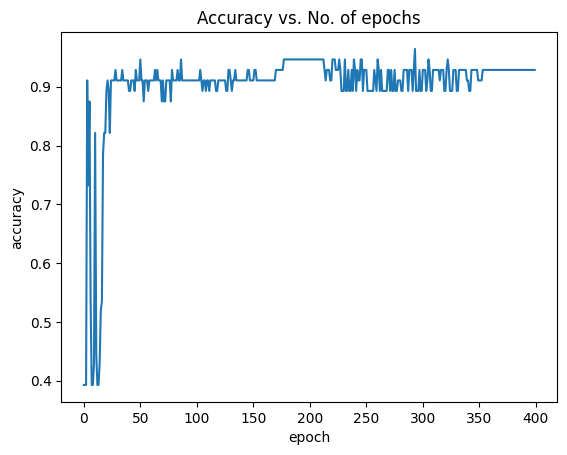

In [ ]:
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

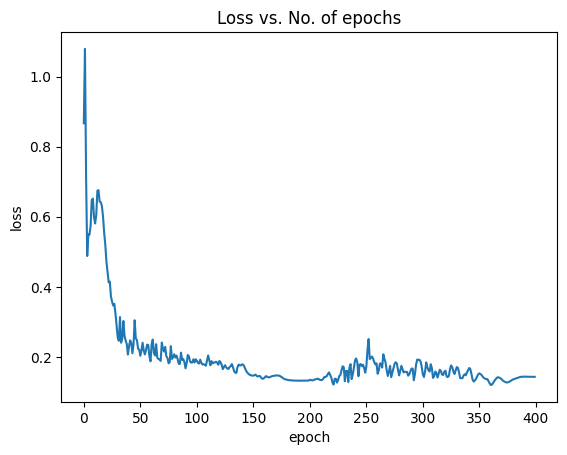

In [ ]:
losses = [x['val_loss'] for x in history]
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

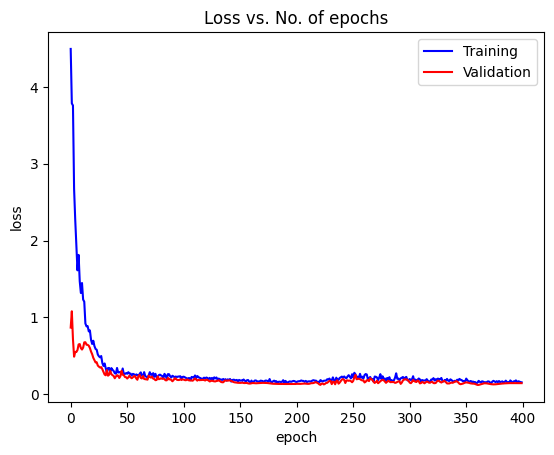

In [ ]:
train_losses = [x.get('train_loss') for x in history]
val_losses = [x['val_loss'] for x in history]
plt.plot(train_losses, 'b')
plt.plot(val_losses, 'r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss vs. No. of epochs');